In [1]:
import h5py
import numpy as np
from gopher import utils
import os
import matplotlib.pyplot as plt
os.environ['CUDA_VISIBLE_DEVICES'] = '2'


In [2]:
data_dir = '/home/amber/colab_hani/gopher/data/atac_tfr/i_6144_w_1/'
sts = utils.load_stats(data_dir)
dataset = utils.make_dataset(data_dir,'train',sts,shuffle=False)

2023-03-13 18:04:14.295984: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-13 18:04:14.767190: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 12946 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:22:00.0, compute capability: 8.6


In [3]:
pr_list = []
for batch in dataset:
    x,y = batch
    for seq in y.numpy():
        bin_seq = seq.reshape(-1,32,27).mean(axis=1)
        coef = np.corrcoef(bin_seq,rowvar=False)
        pr_list.append(np.nanmean(coef))

/home/amber/tf_2/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/amber/tf_2/lib/python3.8/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


0

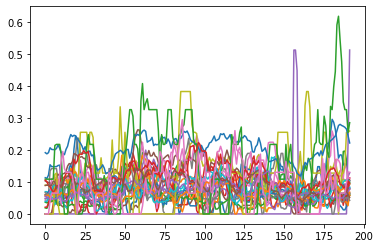

In [21]:
bin_seq = seq.reshape(-1,32,27).mean(axis=1)
plt.plot(range(len(bin_seq)),bin_seq);

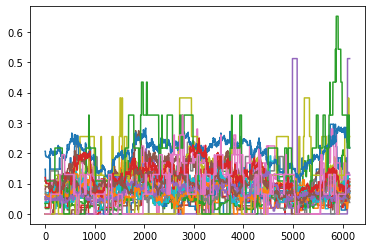

In [9]:
plt.plot(range(len(seq)),seq);